In [1]:
# Project name : NLP Patient Condition Classification
# Objective : Analyze patient condition based on reviews of respective drugs
# We will be focussing on Depression, High Blood Pressure and Diabetes Type 2

**Import necessary libraries**



In [2]:
import pandas as pd
import itertools
import string
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', None)

**Import dataset**

In [162]:
df1 = pd.read_csv('drugsCom_raw.tsv', sep = '\t')

In [163]:
df1.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [164]:
df1.tail()

Unnamed: 0            drugName              condition  \
161292      191035             Campral     Alcohol Dependence   
161293      127085      Metoclopramide        Nausea/Vomiting   
161294      187382             Orencia   Rheumatoid Arthritis   
161295       47128  Thyroid desiccated    Underactive Thyroid   
161296      215220        Lubiprostone  Constipation, Chronic   

                                                   review  rating  \
161292  "I wrote my first report in Mid-October of 201...    10.0   
161293  "I was given this in IV before surgey. I immed...     1.0   
161294  "Limited improvement after 4 months, developed...     2.0   
161295  "I&#039;ve been on thyroid medication 49 years...    10.0   
161296  "I&#039;ve had chronic constipation all my adu...     9.0   

                      date  usefulCount  
161292        May 31, 2015          125  
161293    November 1, 2011           34  
161294      March 15, 2014           35  
161295  September 19, 2015           79  
161296   December 13, 2014          116

In [165]:
df1.shape

(161297, 7)

In [166]:
df1.condition.value_counts().head()

condition
Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Acne              5588
Name: count, dtype: int64

**Filtered data based on Depression, High Blood Pressure and Diabetes Type 2**

In [167]:
df1 = df1[(df1['condition']=='Depression') | (df1['condition']=='High Blood Pressure') | (df1['condition']=='Diabetes, Type 2')]

In [168]:
df1.shape

(13944, 7)

In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13944 entries, 11 to 161290
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13944 non-null  int64  
 1   drugName     13944 non-null  object 
 2   condition    13944 non-null  object 
 3   review       13944 non-null  object 
 4   rating       13944 non-null  float64
 5   date         13944 non-null  object 
 6   usefulCount  13944 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 871.5+ KB


In [170]:
df = df1.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

**EDA**

In [171]:
df.condition.value_counts()

condition
Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: count, dtype: int64

In [172]:
df.head()

condition                                             review
11        Depression  "I have taken anti-depressants for years, with...
31        Depression  "1 week on Zoloft for anxiety and mood swings....
44        Depression  "my gp started me on Venlafaxine yesterday to ...
50  Diabetes, Type 2  "Hey Guys,  It&#039;s been 4 months since my l...
67        Depression  "This medicine saved my life. I was at my wits...

In [235]:
df.tail()

condition  \
161251  High Blood Pressure   
161258  High Blood Pressure   
161278     Diabetes, Type 2   
161286           Depression   
161290  High Blood Pressure   

                                                   review  \
161251  It is fourth blood pressure pill for me. It fe...   
161258  While on Bystolic my feet and arms were numb. ...   
161278  I just got diagnosed with type 2. My doctor pr...   
161286  This is the third med I&#039;ve tried for anxi...   
161290  I have only been on Tekturna for 9 days. The e...   

                                             review_clean  review_length  \
161251  fourth blood pressure pill feel like partly wo...             18   
161258  bystolic foot arm numb blood sugar became seve...             36   
161278  got diagnosed type doctor prescribed invokana ...             21   
161286  third med tried anxiety mild depression week h...             19   
161290  tekturna day effect immediate also calcium cha...             34   

        sentiment  
161251    -0.8126  
161258    -0.8779  
161278     0.2960  
161286    -0.9201  
161290    -0.5574

**Segregating dataframe for analyzing individual condition**

In [173]:
x_dep = df[(df['condition'] == 'Depression')]
x_bp = df[(df['condition'] == 'High Blood Pressure')]
x_diab = df[(df['condition'] == 'Diabetes, Type 2')]

**Word cloud for Depression**

In [174]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(x_dep.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for Depression', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for Depression')

**Word cloud for High Blood Pressure**

In [175]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(x_bp.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for High Blood Pressure', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for High Blood Pressure')

**Word cloud for Diabetes, Type 2**

In [176]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(" ".join(x_diab.review))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word Cloud for Diabetes, Type 2', fontsize = 14)

Text(0.5, 1.0, 'Word Cloud for Diabetes, Type 2')

**Data pre-processing**

In [177]:
for i, col in enumerate(df.columns):
  df.iloc[:, i] = df.iloc[:, i].str.replace('"', '')

In [179]:
df.head()

condition                                             review
11        Depression  I have taken anti-depressants for years, with ...
31        Depression  1 week on Zoloft for anxiety and mood swings. ...
44        Depression  my gp started me on Venlafaxine yesterday to h...
50  Diabetes, Type 2  Hey Guys,  It&#039;s been 4 months since my la...
67        Depression  This medicine saved my life. I was at my wits ...

In [183]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Stopwords**

In [184]:
from nltk.corpus import stopwords

stop = stopwords.words('english')

stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Lemmatization**

In [185]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [186]:
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [187]:
from bs4 import BeautifulSoup
import re

In [188]:
def review_to_words(raw_review):

  # 1. Delete HTML
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()

  # 2. Make a space
  letters_only = re.sub('[^a-zA-Z]', ' ', review_text)

  # 3. Lower letters
  words = letters_only.lower().split()

  # 4. Stopwords
  meaningful_words = [w for w in words if not w in stop]

  # 5. Lemmatization
  lemmatize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]

  # 6. Space join words
  return(' '.join(lemmatize_words))


In [189]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [191]:
df['review_clean'] = df['review'].apply(review_to_words)

In [192]:
df.head()

condition                                             review  \
11        Depression  I have taken anti-depressants for years, with ...   
31        Depression  1 week on Zoloft for anxiety and mood swings. ...   
44        Depression  my gp started me on Venlafaxine yesterday to h...   
50  Diabetes, Type 2  Hey Guys,  It&#039;s been 4 months since my la...   
67        Depression  This medicine saved my life. I was at my wits ...   

                                         review_clean  
11  taken anti depressant year improvement mostly ...  
31  week zoloft anxiety mood swing take mg morning...  
44  gp started venlafaxine yesterday help depressi...  
50  hey guy month since last post wanted give mont...  
67  medicine saved life wit end anti depressant re...

In [194]:
# Drugs condition

condition_DName = df1.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_DName[0:20].plot(kind="bar",# Specify the plot type as a bar chart.
                           figsize = (14,6),# Set the size of the plot (14 inches wide, 6 inches tall).
                           fontsize = 10,# Set the font size for the axis tick labels.
                           color="olive") # Set the color of the bars to olive green.

plt.xlabel("",fontsize = 20)  # Customize the x-axis label (currently left blank) and set its font size
plt.ylabel("",fontsize = 20)  # Customize the y-axis label (currently left blank) and set its font size
plt.title("Drugs condition", fontsize = 20)  # Add a title to the plot and set its font size.

Text(0.5, 1.0, 'Drugs condition')

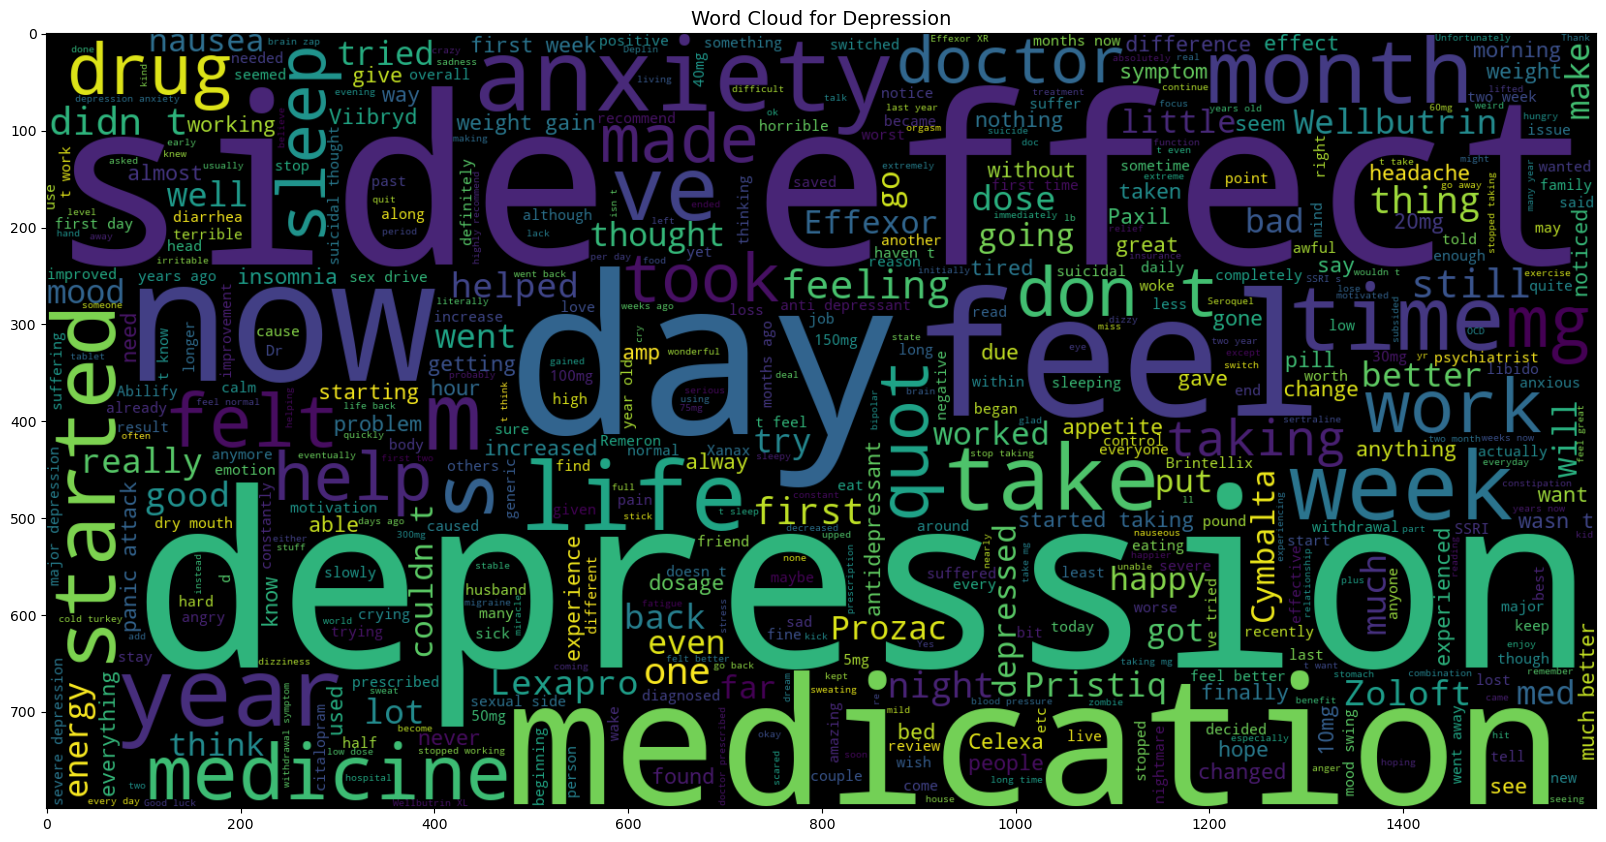

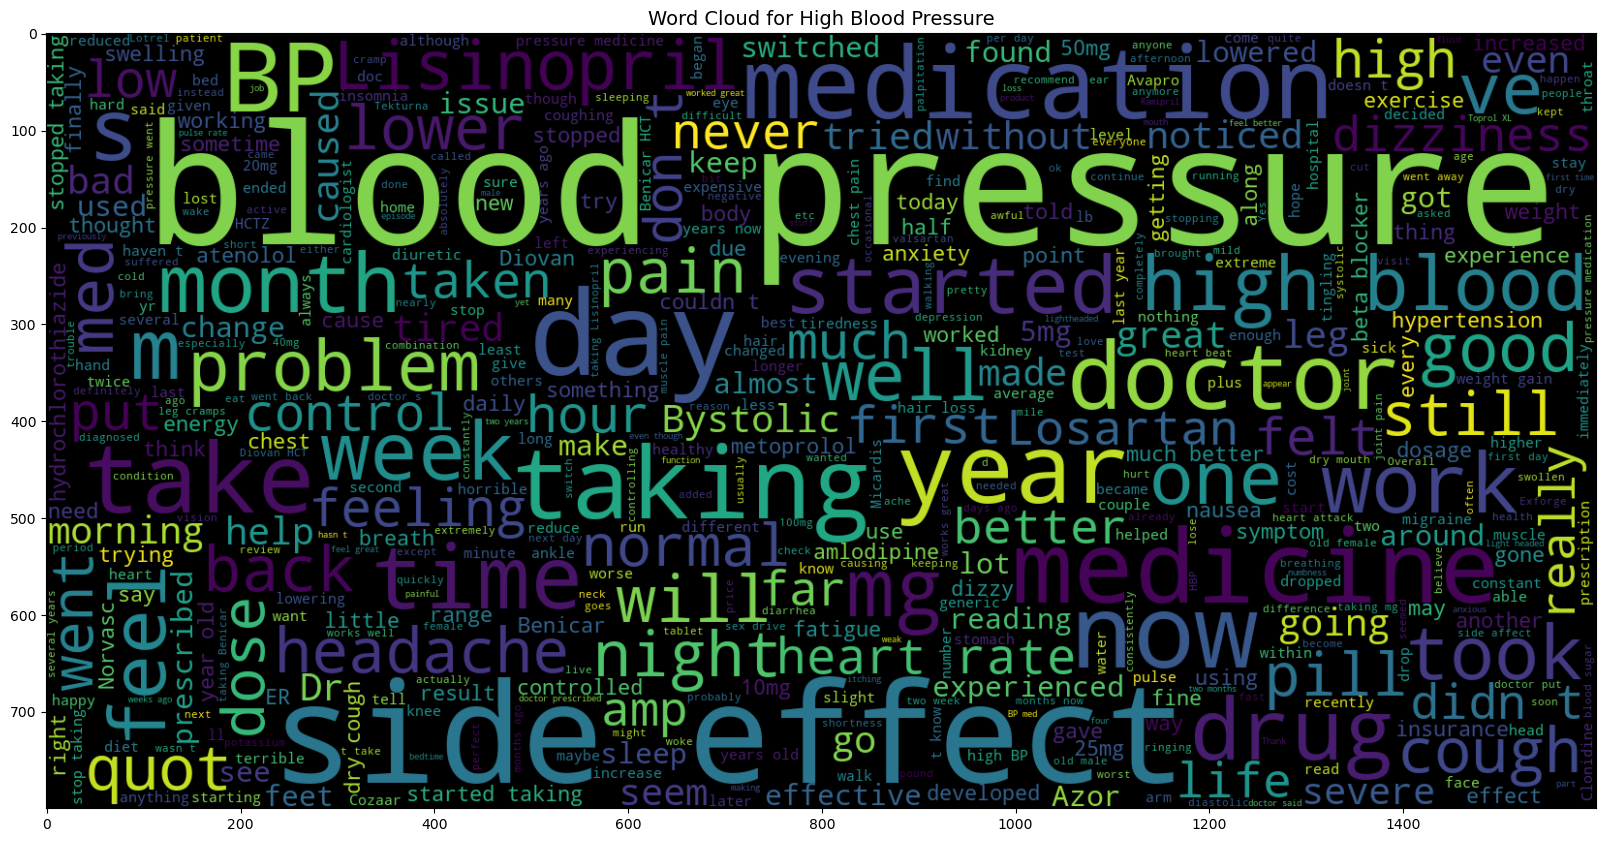

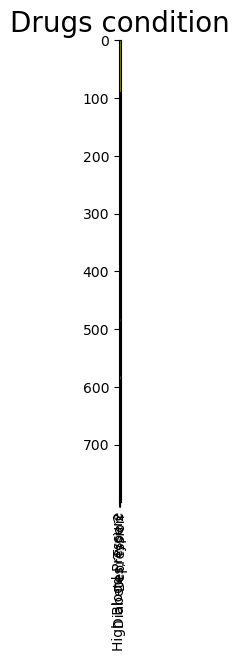

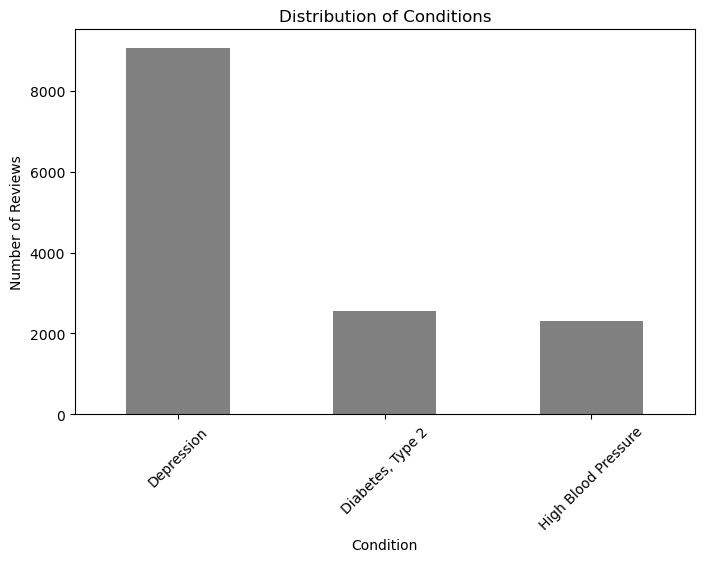

In [30]:
# Distribution of conditions

condition_counts = x['condition'].value_counts()
plt.figure(figsize=(8, 5))
condition_counts.plot(kind='bar', color='grey')
plt.title('Distribution of Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

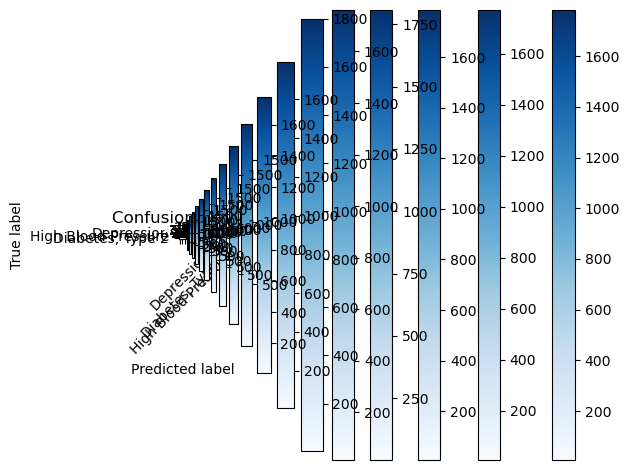

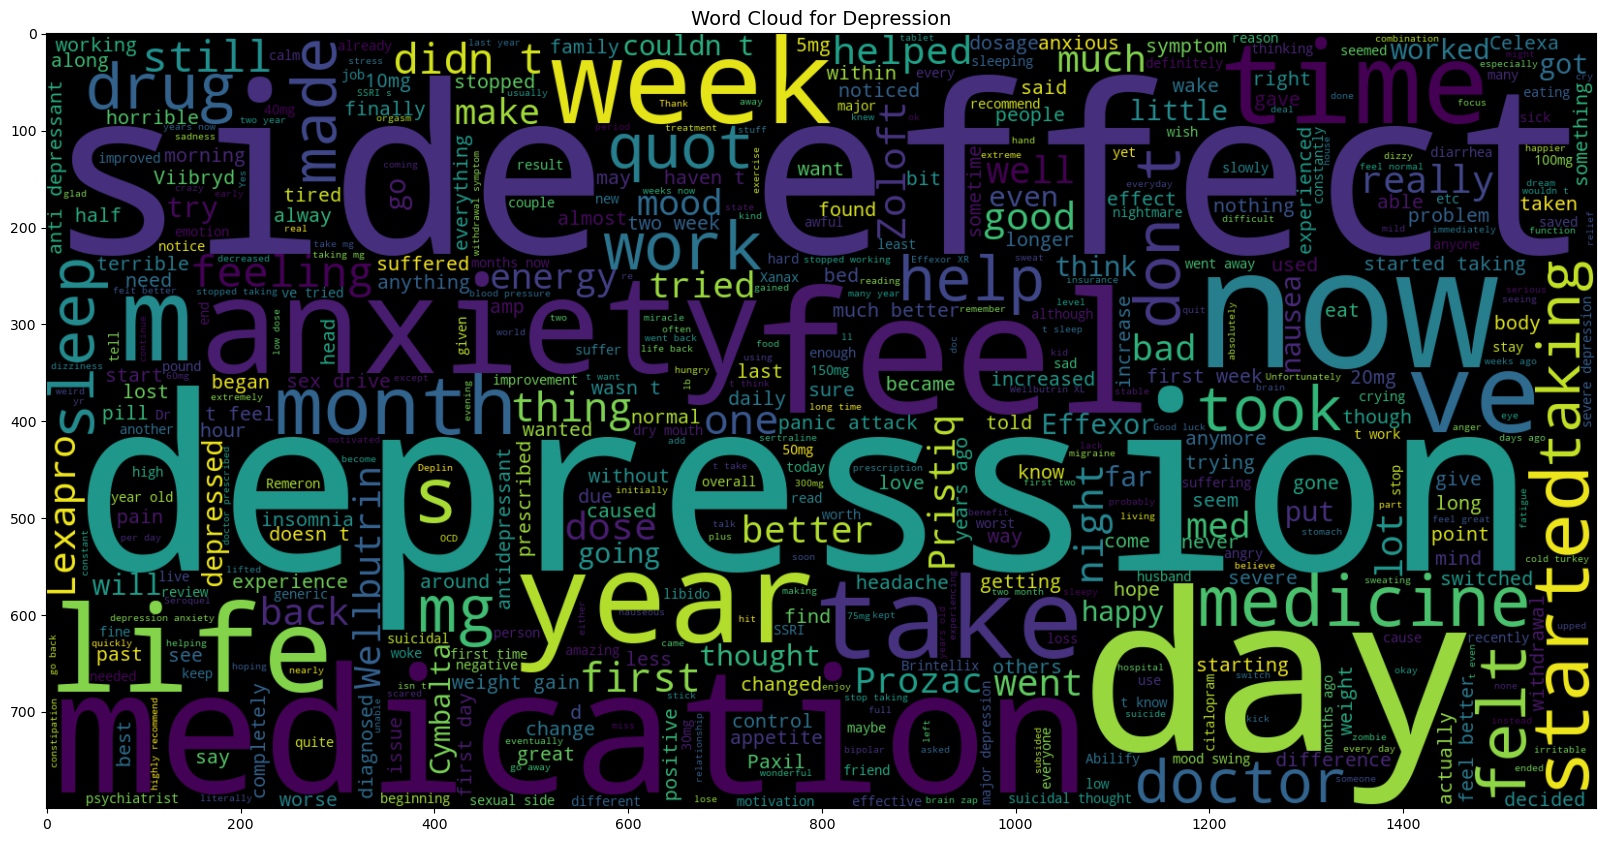

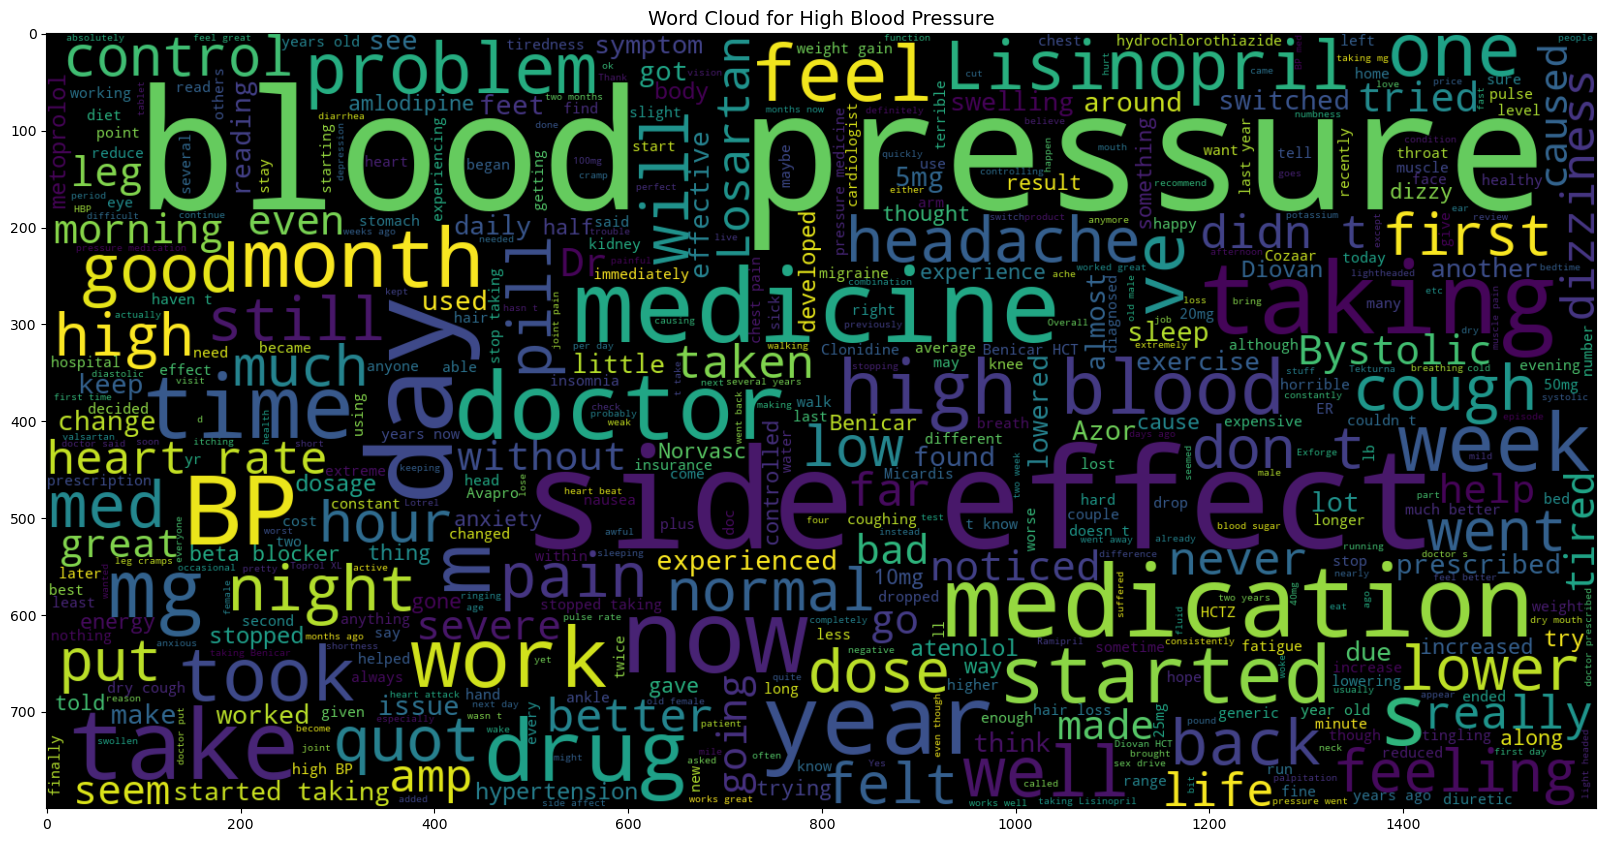

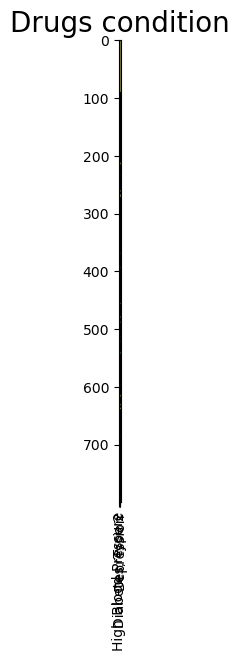

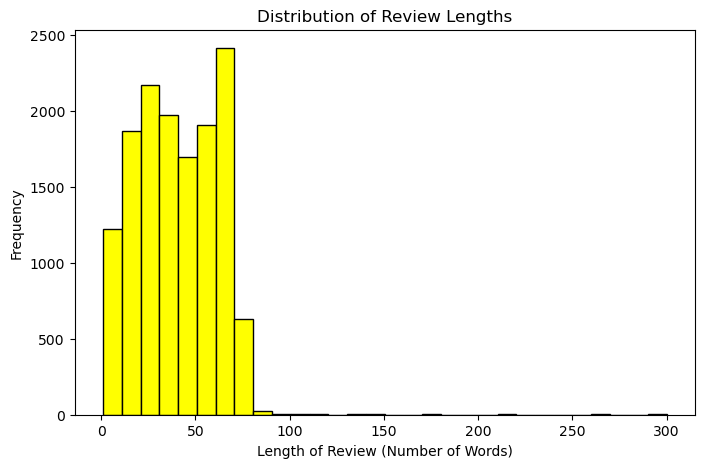

In [195]:
# Length of Reviews

df['review_length'] = df['review_clean'].apply(lambda df: len(df.split()))
plt.figure(figsize=(8, 5))
plt.hist(df['review_length'], bins=30, color='yellow', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review (Number of Words)')
plt.ylabel('Frequency')
plt.show()

In [196]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

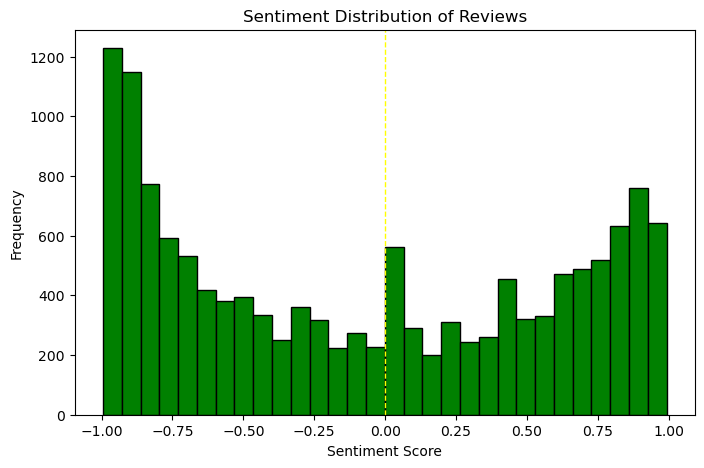

In [197]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['review_clean'].apply(lambda df: sia.polarity_scores(df)['compound'])

plt.figure(figsize=(8, 5))
plt.hist(x['sentiment'], bins=30, color='green', edgecolor='black')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(0, color='yellow', linestyle='dashed', linewidth=1)  # Add a vertical line at 0
plt.show()

**Creating features and target variable**

In [204]:
x = df['review_clean']
y = df['condition']

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)

In [206]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion Matrix without normalization')

  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

**Bag of words**

In [209]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(x_train)

count_test = count_vectorizer.transform(x_test)

count_train

<11155x11177 sparse matrix of type '<class 'numpy.int64'>'
	with 328611 stored elements in Compressed Sparse Row format>

**Naive Bayes Model**

In [210]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Naive Bayes Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Naive Bayes Accuracy : 0.956
Confusion Matrix without normalization


**Passive Aggressive Classifier**

In [211]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Passive Aggressive Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Passive Aggressive Accuracy : 0.949
Confusion Matrix without normalization


LogisticRegression

In [212]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(count_train,y_train)
pred = logistic.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Logistic Regression accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Logistic Regression accuracy :0.959
Confusion Matrix without normalization


RandomForestClassifier

In [213]:
from sklearn.ensemble import RandomForestClassifier

random = RandomForestClassifier()
random.fit(count_train,y_train)
pred = random.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Random Forest accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Random Forest accuracy :0.965
Confusion Matrix without normalization


DecisionTreeClassifier

In [214]:
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier()
decision.fit(count_train,y_train)
pred = decision.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Decision Tree accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Decision Tree accuracy :0.941
Confusion Matrix without normalization


GradientBoostingClassifier

In [215]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(learning_rate=0.1)
gradient.fit(count_train,y_train)
pred = gradient.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print('Gradient Boosting accuracy :%0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Gradient Boosting accuracy :0.932
Confusion Matrix without normalization


**TFIDF**

In [216]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(x_train)
tfidf_test_2 = tfidf_vectorizer.transform(x_test)

**Naive Bayes using TFIDF**

In [217]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print('Naive Bayes Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Naive Bayes Accuracy : 0.947
Confusion Matrix without normalization


**Passive Agressive Classifier using TFIDF**

In [218]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

passive = PassiveAggressiveClassifier()
passive.fit(tfidf_train, y_train)
pred = passive.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print('Passive Aggressive Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Passive Aggressive Accuracy : 0.959
Confusion Matrix without normalization


**TFIDF Bigrams**

In [219]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer.fit_transform(x_train)
tfidf_test_2 = tfidf_vectorizer.transform(x_test)

passive = PassiveAggressiveClassifier()
passive.fit(tfidf_train_2, y_train)
pred = passive.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print('Passive Aggressive Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Passive Aggressive Accuracy : 0.960
Confusion Matrix without normalization


**TFIDF Trigrams**

In [220]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer.fit_transform(x_train)
tfidf_test_3 = tfidf_vectorizer.transform(x_test)

passive = PassiveAggressiveClassifier()
passive.fit(tfidf_train_3, y_train)
pred = passive.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print('Passive Aggressive Accuracy : %0.3f' % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Depression','High Blood Pressure','Diabetes, Type 2'])
plot_confusion_matrix(cm, classes=['Depression','High Blood Pressure','Diabetes, Type 2'])

Passive Aggressive Accuracy : 0.961
Confusion Matrix without normalization


**Feature engineering**

In [221]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
  labelid = list(classifier.classes_).index(classlabel)
  feature_names = vectorizer.get_feature_names_out()
  topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

  for coef, feat in topn:
    print(classlabel, feat, coef)

In [222]:
# Depression features

most_informative_feature_for_class(tfidf_vectorizer,passive,'Depression')

Depression cymbalta 4.864702558048858
Depression viibryd 4.936159238084784
Depression antidepressant 5.363505981720476
Depression lexapro 5.476011867038901
Depression effexor 5.4845942048843135
Depression mood 5.492351465486707
Depression zoloft 6.113313637118585
Depression wellbutrin 8.137054674928489
Depression pristiq 8.817882174506556
Depression depression 12.188463017897652


In [223]:
# High Blood Pressure features

most_informative_feature_for_class(tfidf_vectorizer,passive,'High Blood Pressure')

High Blood Pressure metoprolol 4.2250870001713885
High Blood Pressure atenolol 4.554953605380443
High Blood Pressure amlodipine 4.673935899889136
High Blood Pressure losartan 4.7316472720400276
High Blood Pressure benicar 4.902648085997963
High Blood Pressure bystolic 5.343720114574962
High Blood Pressure lisinopril 6.358658270649652
High Blood Pressure cough 6.648769846366013
High Blood Pressure bp 7.383862531360427
High Blood Pressure pressure 9.04118253956452


In [224]:
# Diabetes, Type 2 features

most_informative_feature_for_class(tfidf_vectorizer,passive,'Diabetes, Type 2')

Diabetes, Type 2 diabetes 4.26644386065836
Diabetes, Type 2 shot 4.39885971164831
Diabetes, Type 2 byetta 4.694681399130058
Diabetes, Type 2 trulicity 5.273850104501371
Diabetes, Type 2 invokana 5.667088868012865
Diabetes, Type 2 januvia 5.779554404109831
Diabetes, Type 2 injection 6.340090925883186
Diabetes, Type 2 metformin 7.338368338509505
Diabetes, Type 2 victoza 7.462081881401215
Diabetes, Type 2 sugar 8.55994406761017


Here we choose random forest for deployment

In [225]:
x = df['review_clean']
y = df['condition']

In [238]:
# Encode the target labels (if they are categorical)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [227]:
# Define the pipeline
model = Pipeline([
    ('vectorizer', TfidfVectorizer(max_features=5000)),  # Convert text to numerical features
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest Classifier
])


In [229]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [230]:
# Fit the pipeline on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=5000)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [232]:
from sklearn.metrics import classification_report,confusion_matrix

In [233]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
                     precision    recall  f1-score   support

         Depression       0.96      0.99      0.97      1800
   Diabetes, Type 2       0.99      0.94      0.96       501
High Blood Pressure       0.96      0.88      0.92       488

           accuracy                           0.96      2789
          macro avg       0.97      0.94      0.95      2789
       weighted avg       0.96      0.96      0.96      2789

Confusion Matrix:
[[1784    2   14]
 [  28  471    2]
 [  54    3  431]]


In [234]:
import joblib

with open('NLP.pkl', 'wb') as f:
    joblib.dump(model, f)